# Reading of CSV file

In [87]:
import pandas as pd

In [88]:
data=pd.read_csv('C://Users//mdbab//OneDrive//Desktop//DATA SCIENCE MATERIAL//DATA//Obesity.csv')

In [89]:
data.head()     # prints the first 5 rows

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [90]:
data.shape    # print the shape of the data

(2111, 17)

In [91]:
data.info()      # print the column name iwth non null value conts and Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [92]:
data.duplicated().sum()   # prints the number to dulicated data

24

In [93]:
data=data.drop_duplicates()     # droping of duplicate data

In [94]:
data.isnull().sum()     # nuber of null values in each columns

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Outliers

In [95]:
import matplotlib.pyplot as plt

In [96]:
data.select_dtypes(exclude='O').columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

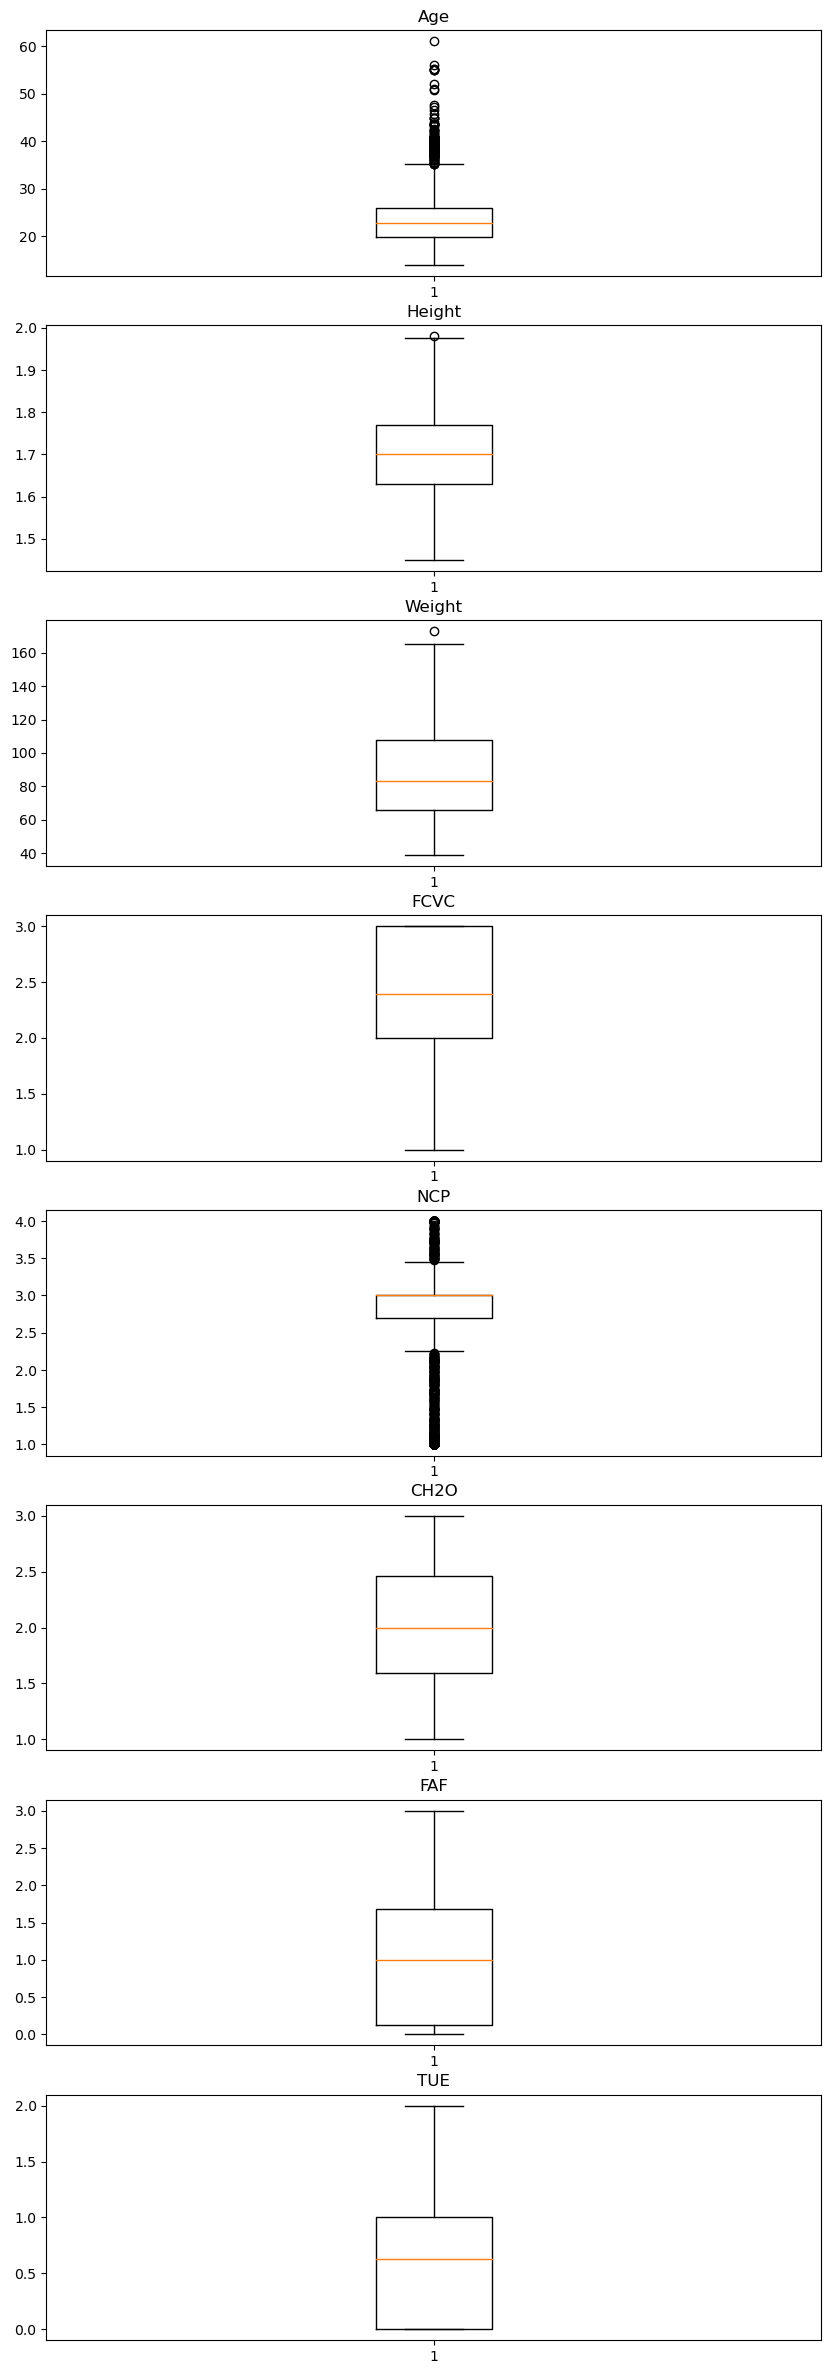

In [97]:
figure,axes=plt.subplots(8,1,figsize=(10,30))
i=0
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    ax=axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    i=i+1

In [98]:
# capping of outlier by IQR method
for i in num_cols:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    m1 = Q1-1.5*IQR
    m2 = Q3+1.5*IQR
    data[i] = data[i].clip(lower=m1,upper=m2)

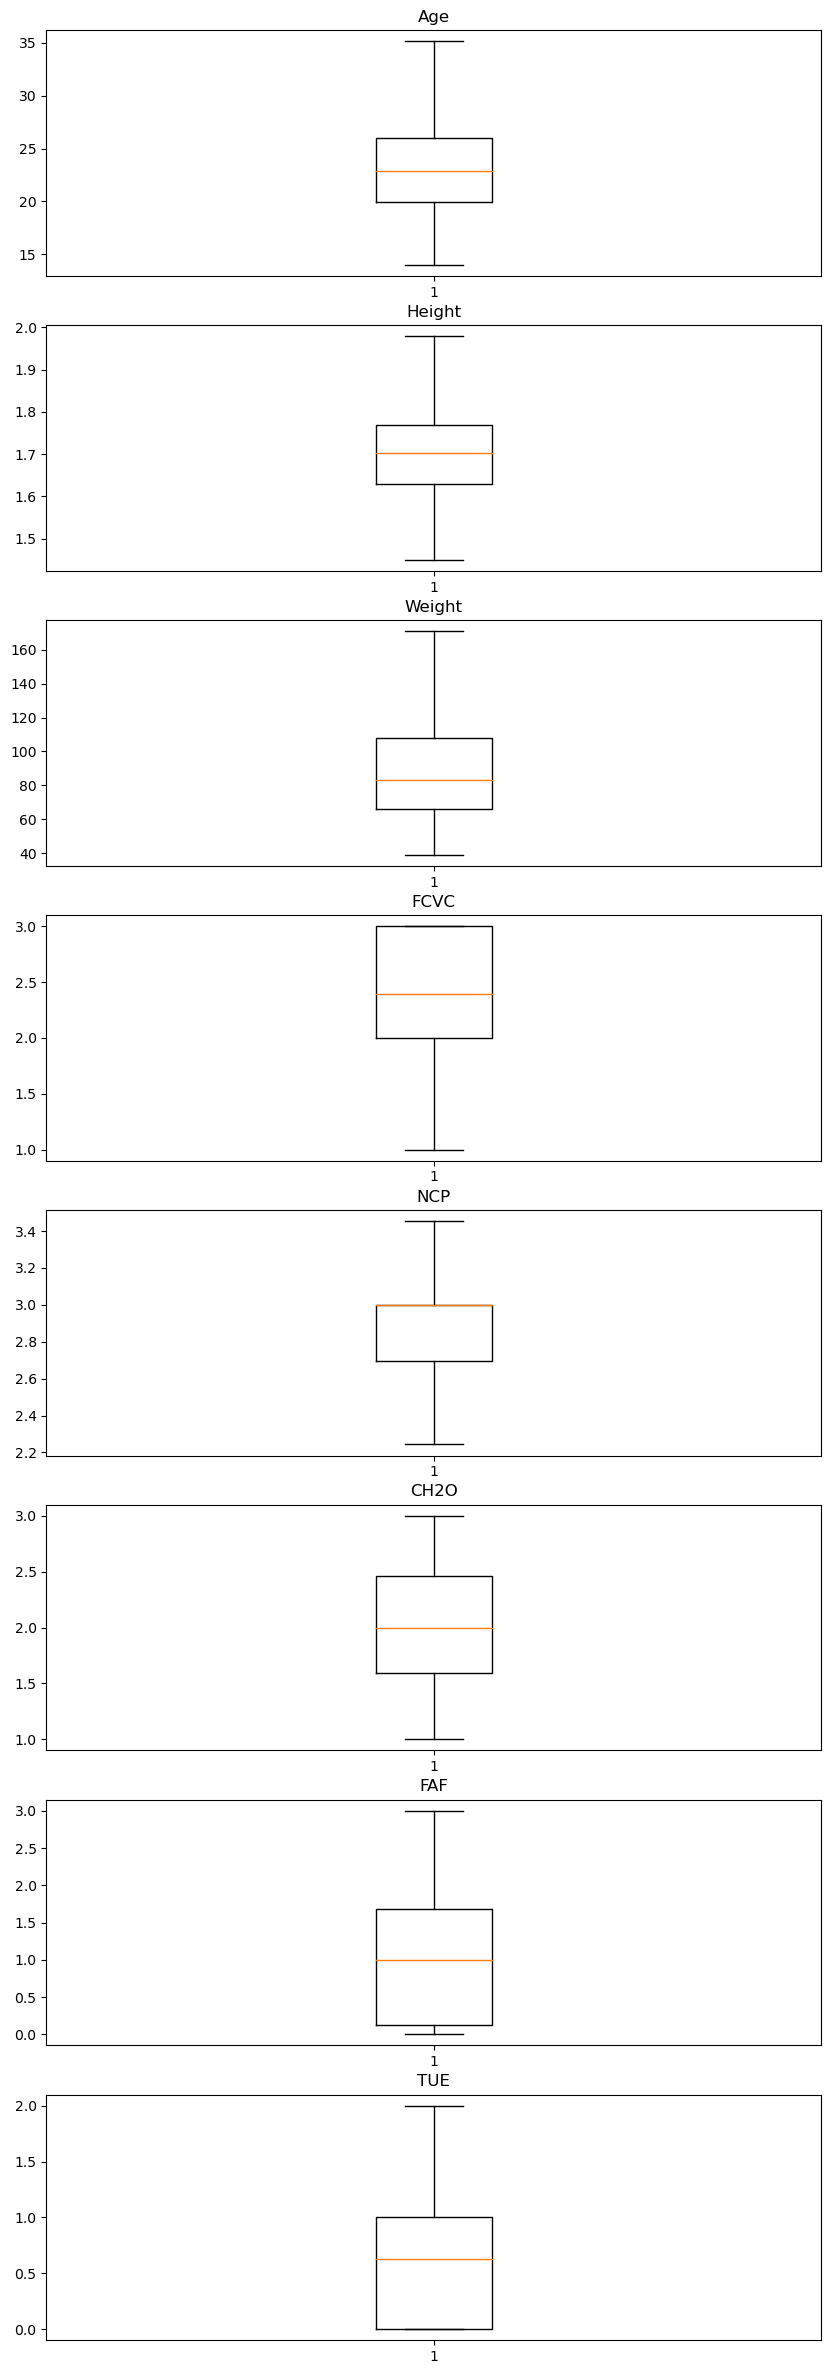

In [99]:
# checking of outlier after capping
figure,axes=plt.subplots(8,1,figsize=(10,30))
i=0
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    ax=axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    i=i+1

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
encoder=LabelEncoder()

In [102]:
cat = data.select_dtypes(include='O').columns
cat

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [103]:
cat_col= ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE','family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

In [104]:
for i in cat_col:      
    data[i]=encoder.fit_transform(data[i])

In [105]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.000000,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.000000,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.000000,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.000000,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,2.243667,0,0,2.0,0,0.0,0.0,2,3,6


## Spliting data into Input and Output

In [106]:
Output = data['NObeyesdad']
Input = data.drop(columns=['NObeyesdad'],axis=1)

## Scaling 

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
a=MinMaxScaler()

In [109]:
Input.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS'],
      dtype='object')

In [110]:
columns = ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS']

In [111]:
Input=a.fit_transform(Input)

In [112]:
Input=pd.DataFrame(Input)

In [113]:
Input.columns = columns

In [114]:
Input.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,0.331344,0.0,0.321689,0.189337,1.000000,0.0,0.5,0.625,0.0,0.0,0.5,1.0,0.000000,0.5,0.666667,0.75
1,0.331344,0.0,0.132460,0.128749,0.666667,0.0,1.0,0.625,1.0,1.0,1.0,1.0,1.000000,0.0,0.666667,0.75
2,0.426013,1.0,0.662301,0.287792,0.333333,0.0,0.5,0.625,0.0,0.0,0.5,1.0,0.666667,0.5,0.666667,0.75
3,0.615353,1.0,0.662301,0.363527,0.333333,0.0,1.0,0.625,0.0,0.0,0.5,0.0,0.666667,0.0,0.666667,1.00
4,0.378679,1.0,0.624455,0.384733,0.666667,0.0,0.5,0.000,0.0,0.0,0.5,0.0,0.000000,0.0,0.666667,0.75


## Spliting into Train and Test data

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Input,Output, test_size = 0.2, random_state = 42)

## SVC

In [116]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
svc_model = SVC(kernel='rbf',degree = 3, C=1.0, gamma='scale')
svc_model.fit(x_train,y_train)

SVC()

In [117]:
y_train_pred = svc_model.predict(x_train)
y_test_pred = svc_model.predict(x_test)

In [152]:
acc_train_score = accuracy_score(y_train, y_train_pred)
acc_test_score = accuracy_score(y_test, y_test_pred)
pre_train_score = precision_score(y_train, y_train_pred, average='weighted')
pre_test_score = precision_score(y_test, y_test_pred, average='weighted')
train_re_call = recall_score(y_train, y_train_pred, average='weighted')
test_re_call = recall_score(y_test, y_test_pred, average='weighted')
train_con_mat = confusion_matrix(y_train, y_train_pred)
test_con_mat = confusion_matrix(y_test, y_test_pred)


print('Train Accuracy score-------->',acc_train_score)
print('Test Accuracy score-------->',acc_test_score)
print('Train Precision score-------->',pre_train_score)
print('Test Precisoin score-------->',pre_test_score)
print('Train Recall score-------->',train_re_call)
print('Test Recall score-------->',test_re_call)
print('Train Confusion matrix-------->',train_con_mat)
print('Test Confusion matrix-------->',test_con_mat)


Train Accuracy score--------> 0.8681845416417017
Test Accuracy score--------> 0.8205741626794258
Train Precision score--------> 0.8660057048847081
Test Precisoin score--------> 0.8190203854635167
Train Recall score--------> 0.8681845416417017
Test Recall score--------> 0.8205741626794258
Train Confusion matrix--------> [[196  11   0   0   0   1   0]
 [ 24 157   2   0   0  21  17]
 [  0   2 251  19   0   3   6]
 [  0   1   3 229   0   0   0]
 [  0   0   0   1 262   0   1]
 [  3  25  12   0   0 163  18]
 [  1   7  17   0   0  25 191]]
Test Confusion matrix--------> [[50  8  0  0  0  0  1]
 [14 32  2  0  0  7  6]
 [ 0  2 64  1  0  1  2]
 [ 0  0  0 63  0  0  1]
 [ 0  0  0  0 60  0  0]
 [ 0  6  4  0  0 34 11]
 [ 0  1  5  0  0  3 40]]


## DECISION TREE CLASSIFIER

In [158]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#instantiate the DecisionTreeClassifier model with criterion gini index
DT_classifier = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=2,random_state=32)

# fit the model
DT_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=32)

In [159]:
y_train_pred = DT_classifier.predict(x_train)
y_test_pred = DT_classifier.predict(x_test)

In [160]:
acc_train_score = accuracy_score(y_train, y_train_pred)
acc_test_score = accuracy_score(y_test, y_test_pred)
pre_train_score = precision_score(y_train, y_train_pred, average='weighted')
pre_test_score = precision_score(y_test, y_test_pred, average='weighted')
train_re_call = recall_score(y_train, y_train_pred, average='weighted')
test_re_call = recall_score(y_test, y_test_pred, average='weighted')
train_con_mat = confusion_matrix(y_train, y_train_pred)
test_con_mat = confusion_matrix(y_test, y_test_pred)


print('Train Accuracy score-------->',acc_train_score)
print('Test Accuracy score-------->',acc_test_score)
print('Train Precision score-------->',pre_train_score)
print('Test Precisoin score-------->',pre_test_score)
print('Train Recall score-------->',train_re_call)
print('Test Recall score-------->',test_re_call)
print('Train Confusion matrix-------->',train_con_mat)
print('Test Confusion matrix-------->',test_con_mat)


Train Accuracy score--------> 0.9251048532055123
Test Accuracy score--------> 0.868421052631579
Train Precision score--------> 0.933908943371698
Test Precisoin score--------> 0.8791132479203392
Train Recall score--------> 0.9251048532055123
Test Recall score--------> 0.868421052631579
Train Confusion matrix--------> [[204   4   0   0   0   0   0]
 [ 10 175   0   0   0  36   0]
 [  0   1 274   1   0   3   2]
 [  0   0   1 232   0   0   0]
 [  0   0   0   0 264   0   0]
 [  0  12   0   0   0 204   5]
 [  0   3   4   0   0  43 191]]
Test Confusion matrix--------> [[55  4  0  0  0  0  0]
 [ 7 34  0  0  0 20  0]
 [ 0  0 66  3  0  0  1]
 [ 0  0  1 63  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  7  0  0  0 48  0]
 [ 0  1  2  0  0  9 37]]


## LOGISTIC REGRESSION

In [161]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

In [163]:
acc_train_score = accuracy_score(y_train, y_train_pred)
acc_test_score = accuracy_score(y_test, y_test_pred)
pre_train_score = precision_score(y_train, y_train_pred, average='weighted')
pre_test_score = precision_score(y_test, y_test_pred, average='weighted')
train_re_call = recall_score(y_train, y_train_pred, average='weighted')
test_re_call = recall_score(y_test, y_test_pred, average='weighted')
train_con_mat = confusion_matrix(y_train, y_train_pred)
test_con_mat = confusion_matrix(y_test, y_test_pred)


print('Train Accuracy score-------->',acc_train_score)
print('Test Accuracy score-------->',acc_test_score)
print('Train Precision score-------->',pre_train_score)
print('Test Precisoin score-------->',pre_test_score)
print('Train Recall score-------->',train_re_call)
print('Test Recall score-------->',test_re_call)
print('Train Confusion matrix-------->',train_con_mat)
print('Test Confusion matrix-------->',test_con_mat)


Train Accuracy score--------> 0.7411623726782505
Test Accuracy score--------> 0.7296650717703349
Train Precision score--------> 0.7299667813855111
Test Precisoin score--------> 0.718672754220504
Train Recall score--------> 0.7411623726782505
Test Recall score--------> 0.7296650717703349
Train Confusion matrix--------> [[184  23   0   0   0   1   0]
 [ 54 100   3   0   1  28  35]
 [  0   3 200  47   8   7  16]
 [  0   1   5 226   1   0   0]
 [  0   0   1   1 262   0   0]
 [  2  26  20   0   1 142  30]
 [  1  18  55  18   3  23 123]]
Test Confusion matrix--------> [[48  8  0  0  0  2  1]
 [18 20  2  0  0 11 10]
 [ 0  2 51  5  3  3  6]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  6  7  0  0 30 12]
 [ 0  2  8  2  0  5 32]]


## RANDOM FOREST CLASSIFIER

In [164]:
from sklearn.ensemble import RandomForestClassifier
RF_C = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=8,min_samples_split=2,random_state=0)
RF_C.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=80, random_state=0)

In [165]:
y_train_pred = RF_C.predict(x_train)
y_test_pred = RF_C.predict(x_test)

In [166]:
acc_train_score = accuracy_score(y_train, y_train_pred)
acc_test_score = accuracy_score(y_test, y_test_pred)
pre_train_score = precision_score(y_train, y_train_pred, average='weighted')
pre_test_score = precision_score(y_test, y_test_pred, average='weighted')
train_re_call = recall_score(y_train, y_train_pred, average='weighted')
test_re_call = recall_score(y_test, y_test_pred, average='weighted')
train_con_mat = confusion_matrix(y_train, y_train_pred)
test_con_mat = confusion_matrix(y_test, y_test_pred)


print('Train Accuracy score-------->',acc_train_score)
print('Test Accuracy score-------->',acc_test_score)
print('Train Precision score-------->',pre_train_score)
print('Test Precisoin score-------->',pre_test_score)
print('Train Recall score-------->',train_re_call)
print('Test Recall score-------->',test_re_call)
print('Train Confusion matrix-------->',train_con_mat)
print('Test Confusion matrix-------->',test_con_mat)


Train Accuracy score--------> 0.9892150988615938
Test Accuracy score--------> 0.930622009569378
Train Precision score--------> 0.9893652896768659
Test Precisoin score--------> 0.9316976561291493
Train Recall score--------> 0.9892150988615938
Test Recall score--------> 0.930622009569378
Train Confusion matrix--------> [[206   2   0   0   0   0   0]
 [  0 218   0   0   0   2   1]
 [  0   0 279   0   0   0   2]
 [  0   0   0 233   0   0   0]
 [  0   0   0   0 264   0   0]
 [  0   3   0   0   0 212   6]
 [  0   1   0   0   0   1 239]]
Test Confusion matrix--------> [[54  5  0  0  0  0  0]
 [ 5 51  0  0  0  4  1]
 [ 0  1 67  0  0  0  2]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  5  0  0  0 48  2]
 [ 0  2  2  0  0  0 45]]


## EXTREME GRADIENT BOOST CLASSIFIER

In [170]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(maxdepth=4,learning_rate=0.1,n_estimators=80)
xgb_clf.fit(x_train,y_train)

C:\Users\mdbab\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:45:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "maxdepth" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None, maxdepth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, ...)

In [171]:
y_train_pred = xgb_clf.predict(x_train)
y_test_pred = xgb_clf.predict(x_test)

In [173]:
acc_train_score = accuracy_score(y_train, y_train_pred)
acc_test_score = accuracy_score(y_test, y_test_pred)
pre_train_score = precision_score(y_train, y_train_pred, average='weighted')
pre_test_score = precision_score(y_test, y_test_pred, average='weighted')
train_re_call = recall_score(y_train, y_train_pred, average='weighted')
test_re_call = recall_score(y_test, y_test_pred, average='weighted')
train_con_mat = confusion_matrix(y_train, y_train_pred)
test_con_mat = confusion_matrix(y_test, y_test_pred)


print('Train Accuracy score-------->',acc_train_score)
print('Test Accuracy score-------->',acc_test_score)
print('Train Precision score-------->',pre_train_score)
print('Test Precisoin score-------->',pre_test_score)
print('Train Recall score-------->',train_re_call)
print('Test Recall score-------->',test_re_call)
print('Train Confusion matrix-------->',train_con_mat)
print('Test Confusion matrix-------->',test_con_mat)


Train Accuracy score--------> 1.0
Test Accuracy score--------> 0.9712918660287081
Train Precision score--------> 1.0
Test Precisoin score--------> 0.9714826247763428
Train Recall score--------> 1.0
Test Recall score--------> 0.9712918660287081
Train Confusion matrix--------> [[208   0   0   0   0   0   0]
 [  0 221   0   0   0   0   0]
 [  0   0 281   0   0   0   0]
 [  0   0   0 233   0   0   0]
 [  0   0   0   0 264   0   0]
 [  0   0   0   0   0 221   0]
 [  0   0   0   0   0   0 241]]
Test Confusion matrix--------> [[56  3  0  0  0  0  0]
 [ 3 56  0  0  0  2  0]
 [ 0  0 69  0  0  0  1]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  3  0  0  0 52  0]
 [ 0  0  0  0  0  0 49]]


## ADA BOOST CLASSIFIER

In [184]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100,learning_rate=0.01,random_state=0)
abc.fit(x_train,y_train)

C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.01, n_estimators=100, random_state=0)

In [185]:
y_train_pred = abc.predict(x_train)
y_test_pred = abc.predict(x_test)

In [186]:
acc_train_score = accuracy_score(y_train, y_train_pred)
acc_test_score = accuracy_score(y_test, y_test_pred)
pre_train_score = precision_score(y_train, y_train_pred, average='weighted')
pre_test_score = precision_score(y_test, y_test_pred, average='weighted')
train_re_call = recall_score(y_train, y_train_pred, average='weighted')
test_re_call = recall_score(y_test, y_test_pred, average='weighted')
train_con_mat = confusion_matrix(y_train, y_train_pred)
test_con_mat = confusion_matrix(y_test, y_test_pred)


print('Train Accuracy score-------->',acc_train_score)
print('Test Accuracy score-------->',acc_test_score)
print('Train Precision score-------->',pre_train_score)
print('Test Precisoin score-------->',pre_test_score)
print('Train Recall score-------->',train_re_call)
print('Test Recall score-------->',test_re_call)
print('Train Confusion matrix-------->',train_con_mat)
print('Test Confusion matrix-------->',test_con_mat)

Train Accuracy score--------> 0.36009586578789693
Test Accuracy score--------> 0.35406698564593303
Train Precision score--------> 0.22695401818496513
Test Precisoin score--------> 0.2274195547221863
Train Recall score--------> 0.36009586578789693
Test Recall score--------> 0.35406698564593303
Train Confusion matrix--------> [[  0  81   0   0   0 127   0]
 [  0  92   0   0   0 113  16]
 [  0   0 224   0   0   1  56]
 [  0   0 233   0   0   0   0]
 [  0   0 264   0   0   0   0]
 [  0  10   0   0   0 111 100]
 [  0   1  31   0   0  35 174]]
Test Confusion matrix--------> [[ 0 19  0  0  0 40  0]
 [ 0 29  0  0  0 28  4]
 [ 0  0 52  0  0  0 18]
 [ 0  0 64  0  0  0  0]
 [ 0  0 60  0  0  0  0]
 [ 0  0  0  0  0 35 20]
 [ 0  0  9  0  0  8 32]]


C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mdbab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
